In [1]:
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from natsort import natsorted
import pandas as pd
from scipy.signal import butter, lfilter, freqz, filtfilt
from scipy.special import erfc



import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
import sys
sys.path.insert(0,'../../../purity-monitor/')
sys.path.insert(0,'../../WaveformAnalysis')

In [3]:
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import Waveform as Waveform
import SiPM as SiPM

In [4]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)
importlib.reload(SiPM)

<module 'SiPM' from '../../../purity-monitor/SiPM.py'>

In [6]:
%store -r dark_count_rate_24 time_24 dark_count_rate_23 time_23 dark_count_rate_22 time_22 dark_count_rate_19 time_19 dark_count_rate_25 time_25

In [7]:
df_rate_19=pd.DataFrame(dark_count_rate_19,columns=['Rate'],dtype=float)
df_rate_22=pd.DataFrame(dark_count_rate_22,columns=['Rate'],dtype=float)
df_rate_23=pd.DataFrame(dark_count_rate_23,columns=['Rate'],dtype=float)
df_rate_24=pd.DataFrame(dark_count_rate_24,columns=['Rate'],dtype=float)
df_rate_25=pd.DataFrame(dark_count_rate_25,columns=['Rate'],dtype=float)

df_time_19=pd.DataFrame(time_19,columns=['Time'],dtype=float)
df_time_22=pd.DataFrame(time_22,columns=['Time'],dtype=float)
df_time_23=pd.DataFrame(time_23,columns=['Time'],dtype=float)
df_time_24=pd.DataFrame(time_24,columns=['Time'],dtype=float)
df_time_25=pd.DataFrame(time_25,columns=['Time'],dtype=float)

# print (df_rate_24)
# print(df_time_24)

In [8]:
df_total_rate=df_rate_19.append(df_rate_22)
df_total_rate=(df_total_rate.append(df_rate_23))
df_total_rate=df_total_rate.append(df_rate_24)
df_total_rate=df_total_rate.append(df_rate_25)

In [9]:
# print(df_total_rate)

In [10]:
# print(df_time_22)
df_time_22=df_time_22+(df_time_19.iloc[-1])
# print(df_time_22.iloc[0])
# print(df_time_22)
df_time_23=df_time_23+(df_time_22.iloc[-1])
# print(df_time_23.iloc[0])
df_time_24=df_time_24+(df_time_23.iloc[-1])
print(df_time_24.iloc[0])
df_time_25=df_time_25+(df_time_24.iloc[-1])
print(df_time_25.iloc[0])


Time    101.383333
Name: 0, dtype: float64
Time    127.283333
Name: 0, dtype: float64


In [11]:
df_total_time=df_time_19.append(df_time_22)
df_total_time=(df_total_time.append(df_time_23))
df_total_time=df_total_time.append(df_time_24)
df_total_time=df_total_time.append(df_time_25)

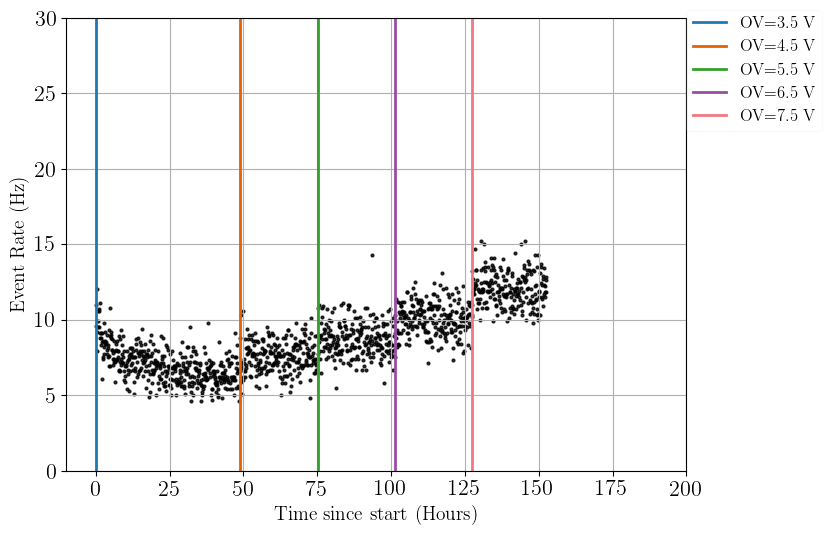

In [12]:
fig=plt.figure(figsize=(8,6))
plt.scatter(df_total_time,df_total_rate,color='k',alpha=0.8,s=4)
plt.xlabel('Time since start (Hours)',fontsize=14)
plt.ylabel('Event Rate (Hz)',fontsize=14)
# plt.title()
plt.xlim(-10,200)
plt.ylim(0,30)
plt.plot([0,0],[0,100],lw=2,label='OV=3.5 V')
plt.plot([df_time_22.iloc[0],df_time_22.iloc[0]],[0,100],lw=2,label='OV=4.5 V')
plt.plot([df_time_23.iloc[0],df_time_23.iloc[0]],[0,100],lw=2,label='OV=5.5 V')
plt.plot([df_time_24.iloc[0],df_time_24.iloc[0]],[0,100],lw=2,label='OV=6.5 V')
plt.plot([df_time_25.iloc[0],df_time_25.iloc[0]],[0,100],lw=2,label='OV=7.5 V')

plt.legend(loc=(1,0.75),framealpha=0.1)
plt.grid()
plt.savefig('Dark_Rate_vs_OV.pdf')
plt.show()


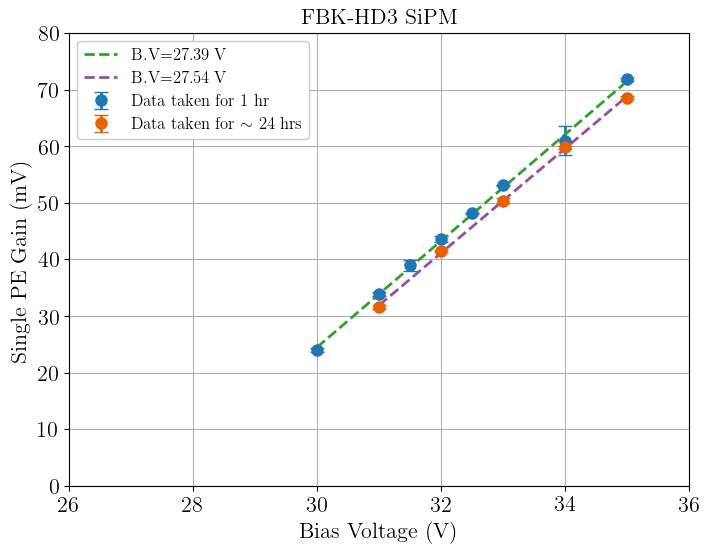

[27.54291287  9.228     ]
[27.39310387  9.39401361]


In [19]:
bias_29=[30,31,31.5,32,32.5,33,34,35]
gain_29=[23.99,33.95,38.96,43.56,48.11,53.08,60.96,71.79]
std_29=[0.37,0.36,1,0.53,0.14,0.12,2.60,0.24]
gain_week=[31.56,41.51,50.38,59.77,68.57]
bias_week=[31,32,33,34,35]
std_week=[0.32,0.21,0.48,0.26,0.2]
def func_line(x,a,b):
    return (x-a)*b
fig=plt.figure(figsize=(8,6))
plt.errorbar(bias_29,gain_29,yerr=std_29,fmt='o',label='Data taken for 1 hr ',ms=8)
plt.errorbar(bias_week,gain_week,yerr=std_week,fmt='o',label='Data taken for $\sim$ 24 hrs',ms=8)
popt_29,pocv_29=curve_fit(func_line,bias_29,gain_29,p0=[27.5,0.2],maxfev=100000)
plt.plot(bias_29,func_line(bias_29,*popt_29),'--',label='B.V={:.2f} V'.format(popt_29[0]))
popt_week,pocv_week=curve_fit(func_line,bias_week,gain_week,p0=[27.5,0.2],maxfev=100000)
plt.plot(bias_week,func_line(bias_week,*popt_week),'--',label='B.V={:.2f} V'.format(popt_week[0]))
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Single PE Gain (mV)')
plt.legend(loc=2)
plt.xlim(26,36)
plt.ylim(0,80)
plt.title('FBK-HD3 SiPM')
plt.grid()
plt.savefig('gainvsbias.pdf')
plt.show()

print(popt_week)
print(popt_29)

In [ ]:
data=SiPM.SiPM(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211129/',Selection='*31.5*.h5')
data.Ch=[Waveform.Waveform(ID=x, Pol=1) for x in range(1,3)]
print (len(data.Files))
for i,File in enumerate(natsorted(data.Files)):
    data.ImportDataFromHDF5(File, data.Ch)


In [ ]:
for ii,ch in enumerate(data.Ch):
    ch.Amp=np.array(ch.Amp)

In [ ]:
print(data.Ch[0].Amp[0])

In [ ]:
fs=1/(np.mean(np.diff(data.Ch[0].Time))/data.Ch[0].TScale)
nyq=0.5*fs

In [ ]:
order=3
lowfreq=100
highfreq=100000
# type='band'

b, a = butter(order, [lowfreq/nyq, highfreq/nyq], btype='band', analog=False)

In [ ]:
filtered_amp=[]
fig=plt.figure(figsize=(8,6))
for ii,amp in enumerate(data.Ch[0].Amp):
    plt.plot(data.Ch[0].Time,amp,lw=0.01,color='k',label='Original')
    filtamp = filtfilt(b,a,amp)
    filtered_amp.append(filtamp)
    plt.plot(data.Ch[0].Time,filtamp,color='blue',lw=0.1,label='Butter Filtered')
    plt.xlabel('Time($\mu$s)')
    plt.ylabel('Amplitude(mV)')
#     plt.legend(loc=1)
# plt.ylim(-200,1000)    
plt.show()
print(len(filtered_amp))

In [ ]:
def func(x,base,V0,sigma,tau,mu):
    return base + V0/2.0 * np.exp(0.5 * (sigma/tau)**2 - (x-mu)/tau) * erfc(1.0/np.sqrt(2.0) * (sigma/tau - (x-mu)/sigma))
    
def gauss_conv(x, mu=0, sigma=0.1):
    x = x-mu
    return np.exp(-np.square((x-mu)/sigma)/2)/(sigma*np.sqrt(2*np.pi))

In [ ]:
desire_x = np.arange(-500,500, data.Ch[0].Time[1]-data.Ch[0].Time[0])
desire_y = gauss_conv(desire_x)
desire_f = np.fft.fft(desire_y)

resp_x = np.arange(0,1000, data.Ch[0].Time[1]-data.Ch[0].Time[0])
resp_y = func(resp_x, 0, 1, 1.83, 46.93, 0)
resp_f = np.fft.fft(resp_y)

filter_f = desire_f/resp_f
filter_y = np.real(np.fft.ifft(filter_f))

plt.figure(figsize=(4,2))
plt.plot(resp_x, resp_y,label='Response')
plt.plot(desire_x, desire_y,label='Desired')
plt.show()

In [ ]:
# print(np.convolve(filtered_amp,filter_y,'same'))
convol_list=[]
for ii,vals in enumerate(filtered_amp):
    convol=np.convolve(vals,filter_y,'same')
    convol_list.append(convol)
    plt.plot(data.Ch[0].Time,convol,color='red',lw=1,label='Deconvolved')
    plt.plot(data.Ch[0].Time,vals,color='k',lw=1,label='Response')
    plt.xlabel('Time($\mu$s)')
#     plt.xlim(0,200)
    plt.ylabel('Amplitude(mV)')
plt.show()
# print(convol_list)

In [ ]:
peak_height = []
peak_pos = []
peak_num = []
peak_wvf_num = []
wvf_num = 0

for ii,vals in enumerate(convol_list):
    peaks,pdict=find_peaks(vals,height=18,distance=1)
    if len(peaks)>0:
        peak_height.extend(pdict['peak_heights'])
        peak_pos.extend(data.Ch[0].Time[peaks])
        peak_num.extend([len(peaks)])
        peak_wvf_num.extend([wvf_num]*len(peaks))
    else:
        peak_height.extend([-99999.99])
        peak_pos.extend([-99999.99])
        peak_num.extend([0])
        peak_wvf_num.extend([wvf_num])
    wvf_num += 1

In [ ]:
# def gauss_func(x,a,b,c):
#     return a*np.exp(-(x-b)**2/(2*c**2))

# h,hx = np.histogram(peak_height, bins=np.arange(0,300,1))

# # plt.hist(peak_height, bins=np.arange(0,300,1))
# # print (h,hx)
# # print (hx[:-1])

# pe = np.median(peak_height)
# print (pe)
# pe_fit = []

# plt.figure()
# for i in range(1,7):
# #     print (i)
# #     print(pe*i-3)
# #     print(pe*i+6+2*i)
#     cut = np.where((hx[:-1]>pe*i-3) & (hx[:-1]<pe*i+6+2*i))
    
#     popt,pcov = curve_fit(gauss_func, hx[:-1][cut], h[cut], 
#                           p0=[np.max(h[cut]), pe*i,10],maxfev=100000)
#     pe_fit.append(popt)
#     plt.plot(hx[:-1][cut], gauss_func(hx[:-1][cut], *popt), color='r', zorder=10)

# pe_fit = np.array(pe_fit)    
# print(pe_fit)
# plt.xlabel('Amplitude')
# plt.ylabel('Counts')
# plt.yscale('log')
# plt.step(hx[:-1], h, lw=2)
# # plt.savefig('deconvolution_hist_pe_11-19-21.pdf')
# plt.show()

In [ ]:
def gauss_func(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

h,hx = np.histogram(peak_height, bins=np.arange(0,300,1))
# print(h)
# print(hx)

pe = np.median(peak_height)
print(pe)
print(np.max(peak_height))
pe_fit = []

plt.figure()


cut=np.where((hx[:-1]<40) & (hx[:-1]>30))
popt,pcov=curve_fit(gauss_func,hx[:-1][cut],h[cut],p0=[np.max(h[cut]),38,10],maxfev=10000000)
pe_fit.append(popt)
pe_fit=np.array(pe_fit)
plt.plot(hx, gauss_func(hx, *popt), color='r', zorder=10)
plt.xlabel('Amplitude')
plt.ylabel('Counts')
# plt.yscale('log')
plt.step(hx[:-1], h, lw=2)
plt.show()
print (pe_fit)

In [ ]:
new_convol_list=[]
for ii,vals in enumerate(filtered_amp):
        convol=np.convolve(vals,filter_y,'same')
        if (np.max(convol)<35):
            new_convol_list.append(convol)
            plt.plot(data.Ch[0].Time,convol,color='red',lw=1,label='Deconvolved')
            plt.plot(data.Ch[0].Time,vals,color='k',lw=1,label='Response')
            plt.xlabel('Time($\mu$s)')
            plt.ylabel('Amplitude(mV)')
plt.show()

In [ ]:
gain = np.diff(pe_fit[:,1])
print(gain)
gain = np.insert(gain,0,pe_fit[0,1])
print(gain)
# print(peak_height)
peak_height_calib = np.array(peak_height)/np.mean(gain)
print(peak_height_calib)
ca = (np.mean(peak_height_calib[(peak_height_calib<7) & (peak_height_calib>0)]) - 1)*100
print(ca)

h,hx = np.histogram(peak_height_calib, bins=np.arange(0,10,0.05))

plt.figure()
plt.grid()
plt.xticks(np.arange(0,10,1))
plt.xlabel('Number of p.e.')
plt.ylabel('Counts')
plt.yscale('log')
plt.step(hx[:-1], h, lw=2, where='post', label='$\Lambda={:.2f}$\% at 31V'.format(ca))
plt.legend(loc='upper right')
plt.savefig('deconvolution_hist_pe_calib_11-19-21.pdf')
plt.show()